In [ ]:
import numpy as np
from scipy.stats import ks_2samp
from scipy import stats
from scipy import stats
import matplotlib.pyplot as plt
import h5py
import illustris_python as il
import sys
sys.path.append('../../py_files/')
#import weights
import control_sample as control
import BRAHMA_python as il_brahma
from tqdm import tqdm

import host_galaxy_enhancement_plots as hostplot


In [12]:
import os
tex_path = '/apps/texlive/2023/bin/x86_64-linux/'
os.environ['PATH'] += os.pathsep + tex_path
import scienceplots
plt.style.use('science')

In [13]:
pop_file_path = '/home/pranavsatheesh/host_galaxies/data/population_files/' 
tng_pop_file_path = '/home/pranavsatheesh/host_galaxies/data/population_files/new/'

TNG_basepath = '/orange/lblecha/IllustrisTNG/Runs/TNG50-1/output'
TNG_50_pop = control.load_pop_file(TNG_basepath,tng_pop_file_path,[0,0,1000,1])
TNG_50_control = control.control_samples_TNG(TNG_50_pop)
TNG_color = '#af8dc3'

processing each merger redshifts for controls: 100%|██████████| 80/80 [00:01<00:00, 54.29it/s]


Number of available mergers in this population is 420
Number of cases where a close enough match is not found within the acceptable tolerance: 28


In [14]:
TNG_50_zbins= hostplot.find_adaptive_z_bins(TNG_50_control.z_merging_pop,z_min=0,z_max=5,zbin_width=0.4,min_N_values=20)
print('TNG50 zbins:',TNG_50_zbins)

[74, 62, 51, 53, 49, 36, 31, 21]
TNG50 zbins: [0.  0.4 0.8 1.2 1.6 2.  2.4 2.8 3.5]


In [15]:
brahma_basepath="/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/"
brahma_simName_array = ['SM5_TNG','SM5_LW10_TNG','SM5_LW10_LOWSPIN_TNG','SM5_LW10_LOWSPIN_RICH_TNG']
brahma_sim_colors = {brahma_simName_array[0]: '#bdc9e1', brahma_simName_array[1]: '#67a9cf', brahma_simName_array[2]: '#1c9099', brahma_simName_array[3]: '#016c59'}
brahma_sim_obj = {}
brahma_sim_zbins = {}
#brahma_sim_zbin_width = {}
for i,sim in enumerate(brahma_simName_array):
    simPath = brahma_basepath + sim + '/'
    brahma_pop_Nstar10 = control.load_pop_file(simPath,pop_file_path,[0,0,10,1])
    brahma_control = control.control_sample_brahma(brahma_pop_Nstar10)
    brahma_sim_obj[sim] = brahma_control
    #brahma_sim_zbin_width,brahma_sim_zbins[sim] =hostplot.find_best_z_width(brahma_control.z_merging_pop,z_min=0,z_max=10,z_width_initial=0.2)
    brahma_sim_zbins[sim] = hostplot.find_adaptive_z_bins(brahma_control.z_merging_pop,z_min=0,z_max=12,zbin_width=0.3,min_N_values=5)
    print(sim,brahma_sim_zbins[sim])

processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 471.03it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 120
number of processable mergers with valid controls:
654
[28, 46, 52, 92, 95, 138, 98, 48, 33, 17, 7]
SM5_TNG [0.  0.3 0.6 0.9 1.2 1.5 2.1 3.1 4.1 5.1 6.1 8.1]


processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 669.71it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 117
number of processable mergers with valid controls:
526
[23, 33, 48, 63, 69, 96, 88, 52, 31, 16, 5]
SM5_LW10_TNG [0.  0.3 0.6 0.9 1.2 1.5 2.1 3.1 4.1 5.1 6.1 7.1]


processing each merger redshifts for controls: 100%|██████████| 17/17 [00:00<00:00, 829.85it/s]

Number of cases where a close enough match is not found within the acceptable tolerance: 85


number of processable mergers with valid controls:
400
[26, 22, 27, 40, 42, 91, 61, 35, 26, 19, 6, 5]
SM5_LW10_LOWSPIN_TNG [0.  0.3 0.6 0.9 1.2 1.5 2.1 3.1 4.1 5.1 6.1 7.1 9.1]


processing each merger redshifts for controls: 100%|██████████| 18/18 [00:00<00:00, 1136.82it/s]

Number of cases where a close enough match is not found within the acceptable tolerance: 53
number of processable mergers with valid controls:
123
[7, 6, 18, 14, 25, 12, 17, 12, 5, 5]
SM5_LW10_LOWSPIN_RICH_TNG [0.  0.3 0.6 1.  1.5 2.1 3.1 4.1 5.1 6.1 8.1]


In [16]:
brahma_zbins = hostplot.find_brahma_adaptive_z_bins(brahma_sim_obj,brahma_simName_array,z_lower=0,z_max=15,zbin_width=0.4,min_N_values=5)
print('Brahma common zbins:',brahma_zbins)

Brahma common zbins: [0.  0.4 0.8 1.2 1.6 2.1 3.1 4.1 5.1 6.1 8.1]


SM5_TNG [ 38  88  92  95 138  98  48  33  17   7]
SM5_LW10_TNG [31 73 63 69 96 88 52 31 16  7]
SM5_LW10_LOWSPIN_TNG [35 40 40 42 91 61 35 26 19  9]
SM5_LW10_LOWSPIN_RICH_TNG [10  7 14 14 25 12 17 12  5  5]


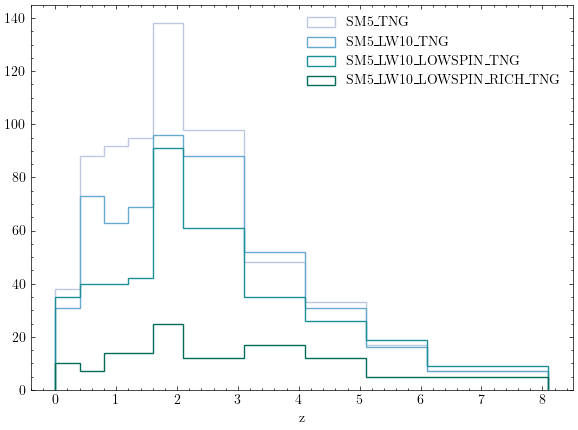

In [17]:
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=10,ticksize=10,legendsize=10)
fig,ax = plt.subplots(1,1,figsize=(7,5))

for i,sim in enumerate(brahma_simName_array):

    z_mergers = brahma_sim_obj[sim].z_merging_pop
    N,_ = np.histogram(z_mergers,bins=brahma_zbins)
    print(sim,N)
    ax.hist(z_mergers,bins=brahma_zbins,label=sim,histtype='step',color=brahma_sim_colors[sim])
ax.set_xlabel("z")
ax.legend()
plt.show()

SM5_TNG [ 38  88  92  95 138  98  48  33  17   7]
SM5_LW10_TNG [31 73 63 69 96 88 52 31 16  7]
SM5_LW10_LOWSPIN_TNG [35 40 40 42 91 61 35 26 19  9]
SM5_LW10_LOWSPIN_RICH_TNG [10  7 14 14 25 12 17 12  5  5]


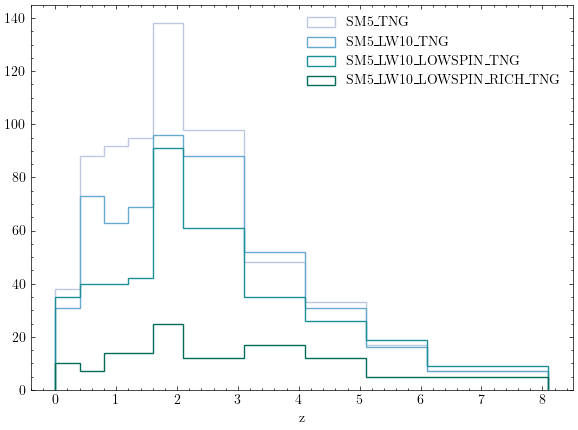

In [7]:
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=10,ticksize=10,legendsize=10)
fig,ax = plt.subplots(1,1,figsize=(7,5))

for i,sim in enumerate(brahma_simName_array):

    z_mergers = brahma_sim_obj[sim].z_merging_pop
    N,_ = np.histogram(z_mergers,bins=brahma_zbins)
    print(sim,N)
    ax.hist(z_mergers,bins=brahma_zbins,label=sim,histtype='step',color=brahma_sim_colors[sim])
ax.set_xlabel("z")
ax.legend()
plt.show()

### Check all matches in brahma runs

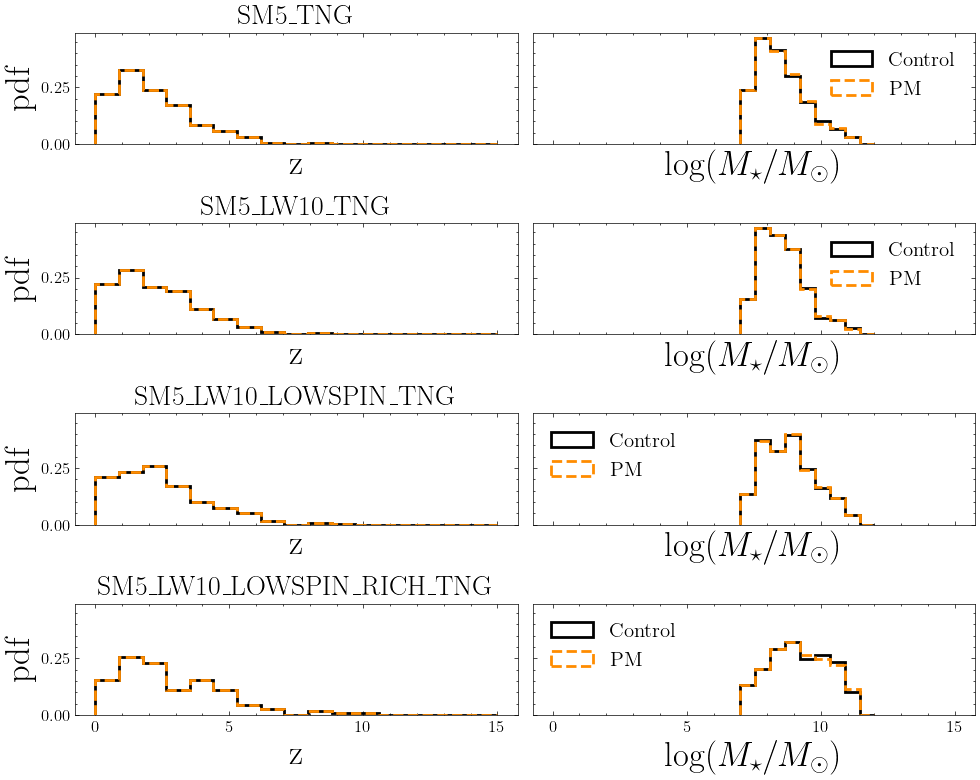

In [19]:
fig, axes = plt.subplots(4,2, figsize=(10,8),sharex=True,sharey=True)
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=20,ticksize=20,legendsize=20)
# axes[1][2].set_visible(False)
# axes[1][0].set_position([0.24,0.125,0.228,0.343])
# axes[1][1].set_position([0.55,0.125,0.228,0.343])
flattened_axes = axes.flatten()

for i,sim in enumerate(brahma_simName_array):
    ax_plt = [axes[i][0],axes[i][1]]
    axes_plt = hostplot.match_z_Mstar_plot(ax_plt,brahma_sim_obj[sim],Mstar_binsize = 0.5,Mstar_min = 7,Mstar_max = 12,z_binsize = 0.8,z_min = 0,z_max = 15)
    axes_plt[0].set_title(sim)

fig.tight_layout()
fig.savefig('../../figures/Mstar_z_distribution_brahma_all.pdf')

## sSFR enhancements in BRAHMA 

Median sSFR in mergers:
SM5_TNG,2.39e-01
SM5_LW10_TNG,3.47e-01
SM5_LW10_LOWSPIN_TNG,6.31e-01
SM5_LW10_LOWSPIN_RICH_TNG,1.69e+00


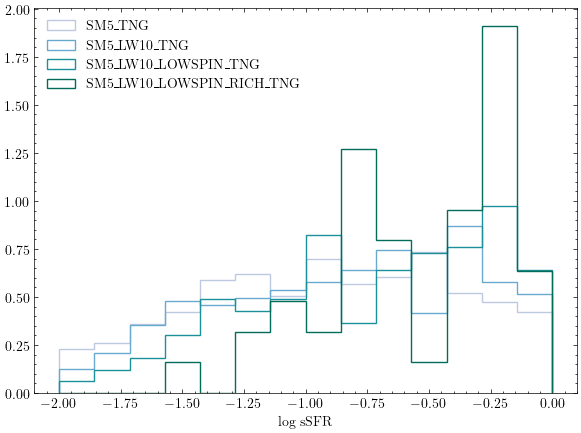

In [22]:
SFR_log_min = -2
SFR_log_max = 2
SFR_log_bins = np.linspace(SFR_log_min,SFR_log_max,15)

hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=10,ticksize=10,legendsize=10)
fig,ax = plt.subplots(1,1,figsize=(7,5))

print("Median sSFR in mergers:")
for i,sim in enumerate(brahma_simName_array):

    SFR_mergers = brahma_sim_obj[sim].SFR_merging_pop
    print(f"{sim},{np.median(SFR_mergers[SFR_mergers>0]):2.2e}")
    ax.hist(np.log10(SFR_mergers[SFR_mergers>0]),bins=SFR_log_bins,label=sim,histtype='step',density=True,color=brahma_sim_colors[sim])
ax.set_xlabel("log sSFR")
ax.legend()
plt.show()

8.1
7.1
9.1
8.1


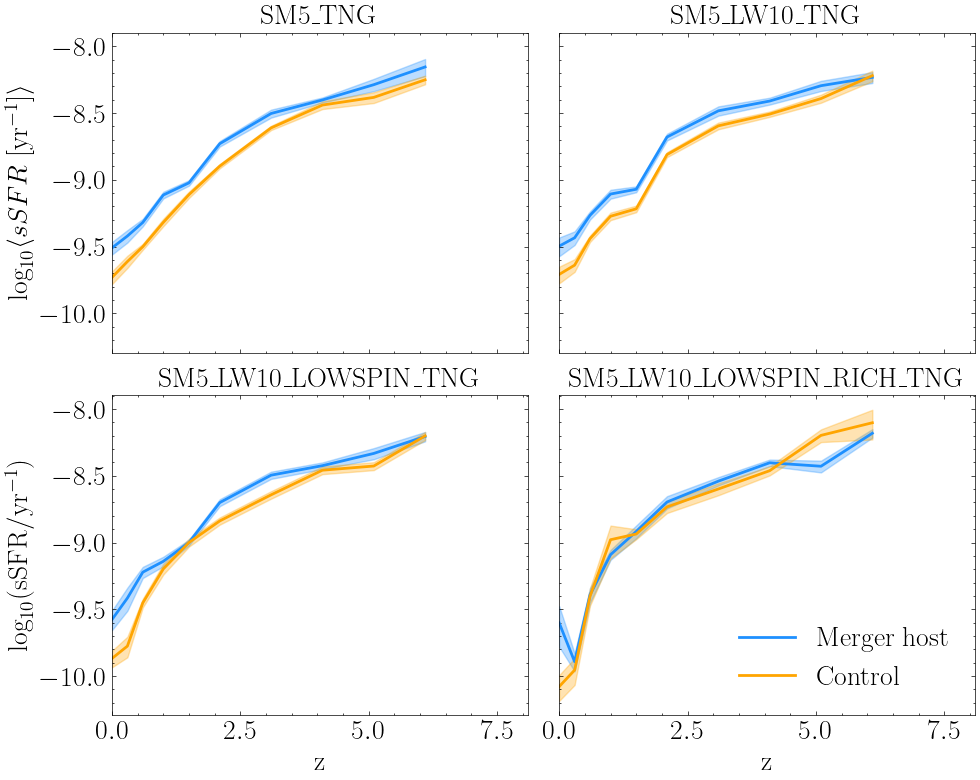

In [ ]:
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=20,ticksize=20,legendsize=20)
fig, axes = plt.subplots(2,2, figsize=(10,8),sharex=True,sharey=True)

flattened_axes = axes.flatten()

for i,sim in enumerate(brahma_simName_array):
    ax1 = hostplot.sSFR_evolution_comparison_plot(flattened_axes[i],brahma_sim_obj[sim],brahma_zbins)
    ax1.set_title(sim)
    ax1.set_xlim(0,brahma_sim_zbins[sim][-1])

axes[0,0].set_ylabel(r'$\log_{10}\langle sSFR \; [\mathrm{yr}^{-1}]\rangle$')
axes[1,0].set_ylabel(r'$\log_{10}(\mathrm{sSFR/yr^{-1}})$')
axes[1,0].set_xlabel('z')
axes[1,1].set_xlabel('z')

ax1.legend()
fig.tight_layout()

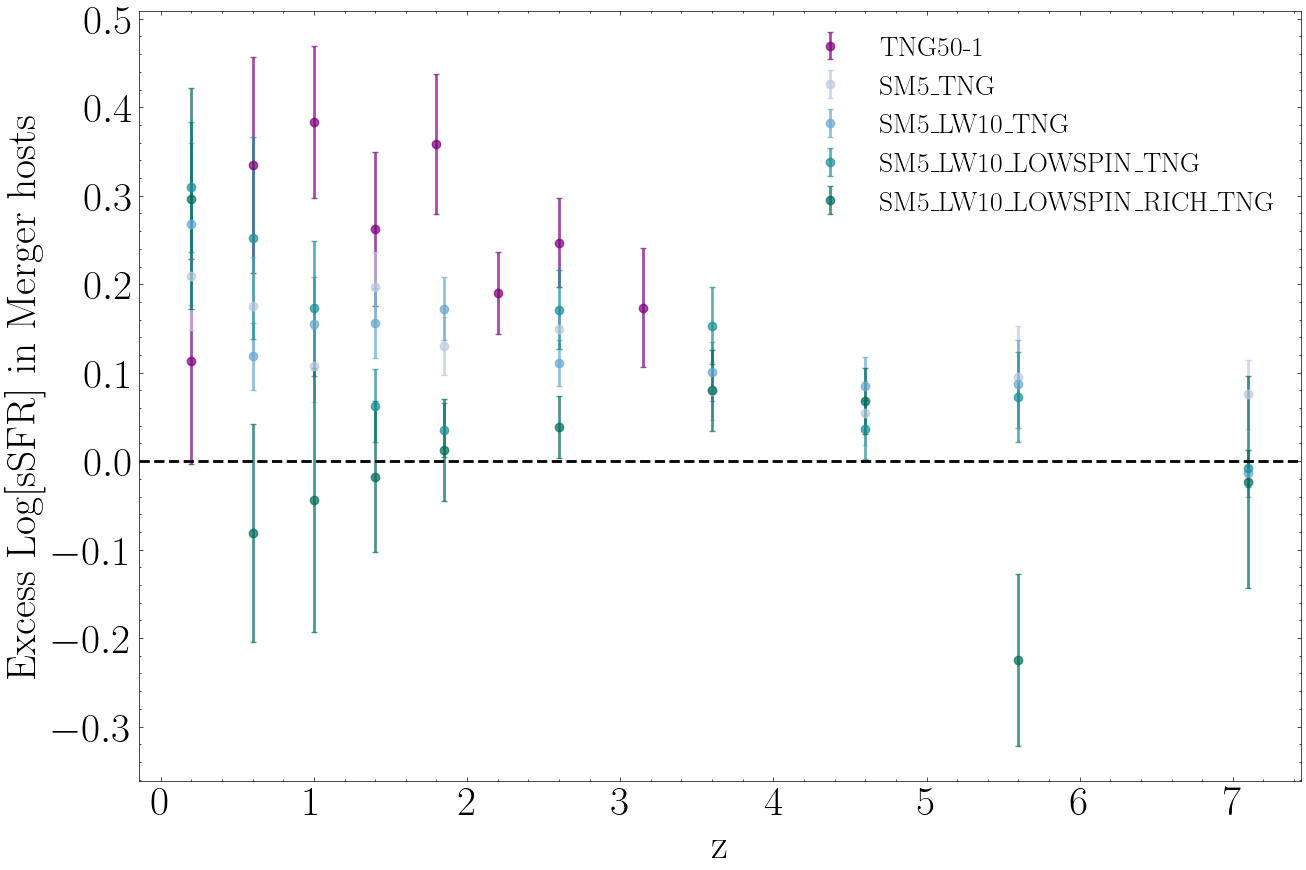

In [13]:
z_bins = np.arange(0,10,1.3)
z_bins_tng = np.arange(0,4,0.5)

hostplot.set_plot_style(linewidth=2, titlesize=30,labelsize=30,ticksize=30,legendsize=20)
fig,ax = plt.subplots(1,1,figsize=(15,10))

avg_sSFR_tng,std_sSFR_tng = hostplot.sSFR_enhancement_calculate(TNG_50_control,TNG_50_zbins)
ax.errorbar(TNG_50_zbins[:-1]+np.diff(TNG_50_zbins)/2,avg_sSFR_tng,yerr=std_sSFR_tng,fmt='o',capsize=2,label='TNG50-1',color='purple',alpha=0.7)
for i,sim in enumerate(brahma_simName_array):
    avg_sSFR_enh,std_sSFR_enh = hostplot.sSFR_enhancement_calculate(brahma_sim_obj[sim],brahma_zbins)
    ax.errorbar(brahma_zbins[:-1]+ np.diff(brahma_zbins)/2,avg_sSFR_enh,yerr=std_sSFR_enh,fmt='o',capsize=2,label=sim,color=brahma_sim_colors[sim],alpha=0.7)
    #ax.errorbar(brahma_zbins[:-1]+ np.diff(brahma_zbins)/2,avg_sSFR_enh,yerr=std_sSFR_enh,xerr=np.diff(brahma_zbins)/2,fmt='o',capsize=2,label=sim,color=brahma_sim_colors[sim],alpha=0.7)

ax.set_xlabel('z')
ax.set_ylabel('Excess Log[sSFR] in Merger hosts')
ax.axhline(0,linestyle='--',color='k')
ax.legend()
fig.savefig('../../figures/sSFR_enhancement_comparison_all.pdf')

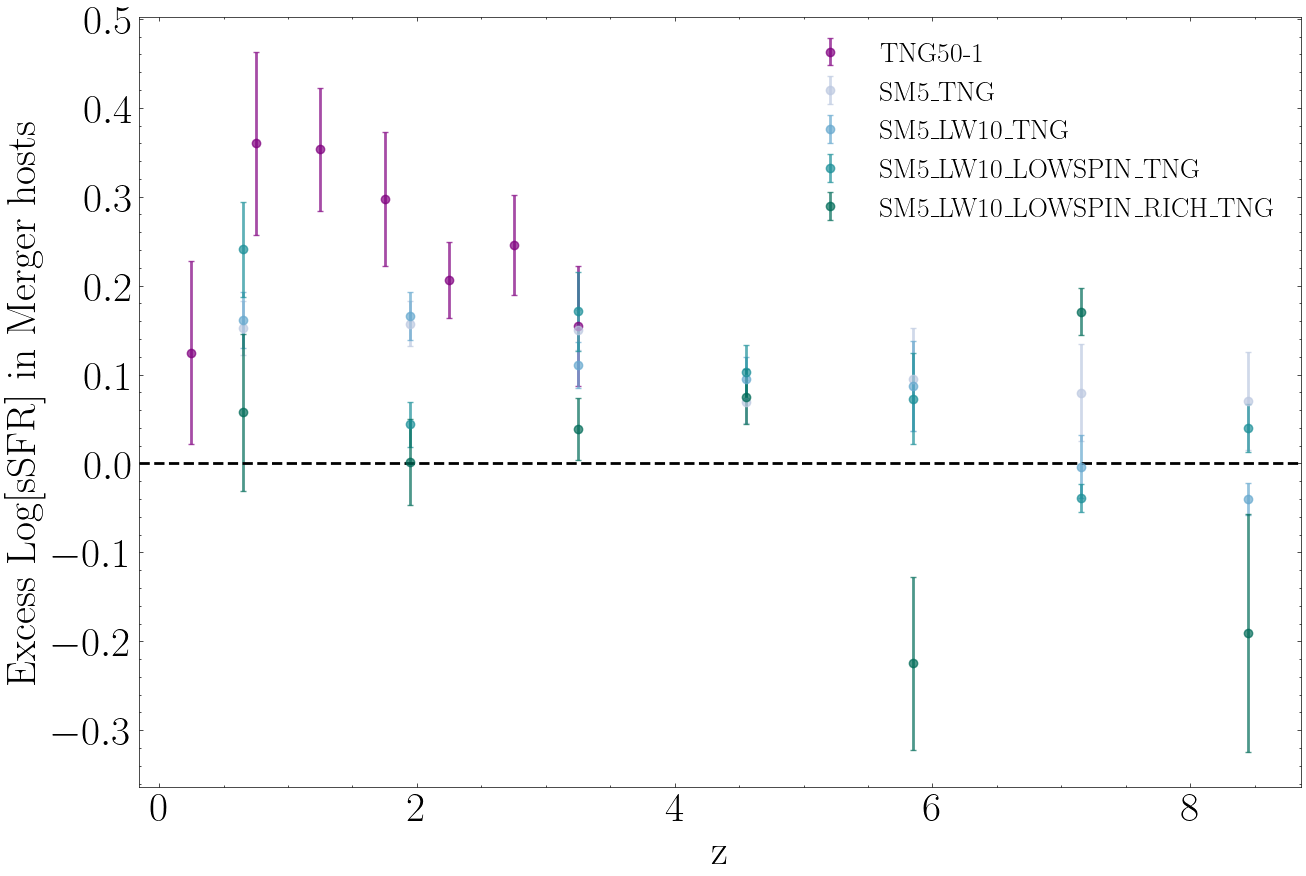

In [ ]:
z_bins = np.arange(0,10,1.3)
z_bins_tng = np.arange(0,4,0.5)

hostplot.set_plot_style(linewidth=2, titlesize=30,labelsize=30,ticksize=30,legendsize=20)
fig,ax = plt.subplots(1,1,figsize=(15,10))


avg_sSFR_tng,std_sSFR_tng = hostplot.sSFR_enhancement_calculate(TNG_50_control,z_bins_tng)
ax.errorbar(z_bins_tng[:-1]+np.diff(z_bins_tng)/2,avg_sSFR_tng,yerr=std_sSFR_tng,fmt='o',capsize=2,label='TNG50-1',color='purple',alpha=0.7)
for i,sim in enumerate(brahma_simName_array):
    avg_sSFR_enh,std_sSFR_enh = hostplot.sSFR_enhancement_calculate(brahma_sim_obj[sim],brahma_sims_zbin)
    ax.errorbar(brahma_sims_zbin[:-1]+ np.diff(brahma_sims_zbin)/2,avg_sSFR_enh,yerr=std_sSFR_enh,fmt='o',capsize=2,label=sim,color=brahma_sim_colors[sim],alpha=0.7)

ax.set_xlabel('z')
ax.set_ylabel('Excess Log[sSFR] in Merger hosts')
ax.axhline(0,linestyle='--',color='k')
ax.legend()

## BHAR enhancements in BRAHMA

Median BHAR in mergers:
SM5_TNG,1.34e-04
SM5_LW10_TNG,1.65e-04
SM5_LW10_LOWSPIN_TNG,2.83e-04
SM5_LW10_LOWSPIN_RICH_TNG,3.72e-04


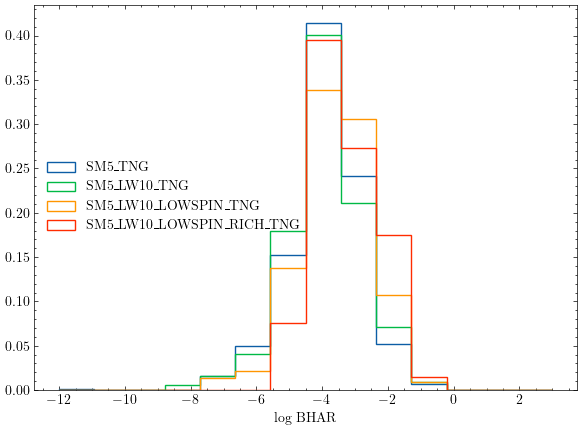

In [9]:
SFR_log_min = -12
SFR_log_max = 3
SFR_log_bins = np.linspace(SFR_log_min,SFR_log_max,15)

hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=10,ticksize=10,legendsize=10)
fig,ax = plt.subplots(1,1,figsize=(7,5))

print("Median BHAR in mergers:")
for i,sim in enumerate(brahma_simName_array):

    Mdot_mergers = brahma_sim_obj[sim].Mdot_merging_pop
    print(f"{sim},{np.median(Mdot_mergers[Mdot_mergers>0]):2.2e}")
    ax.hist(np.log10(Mdot_mergers[Mdot_mergers>0]),bins=SFR_log_bins,label=sim,histtype='step',density=True,color=brahma_sim_colors[sim])
ax.set_xlabel("log BHAR")
ax.legend()
plt.show()

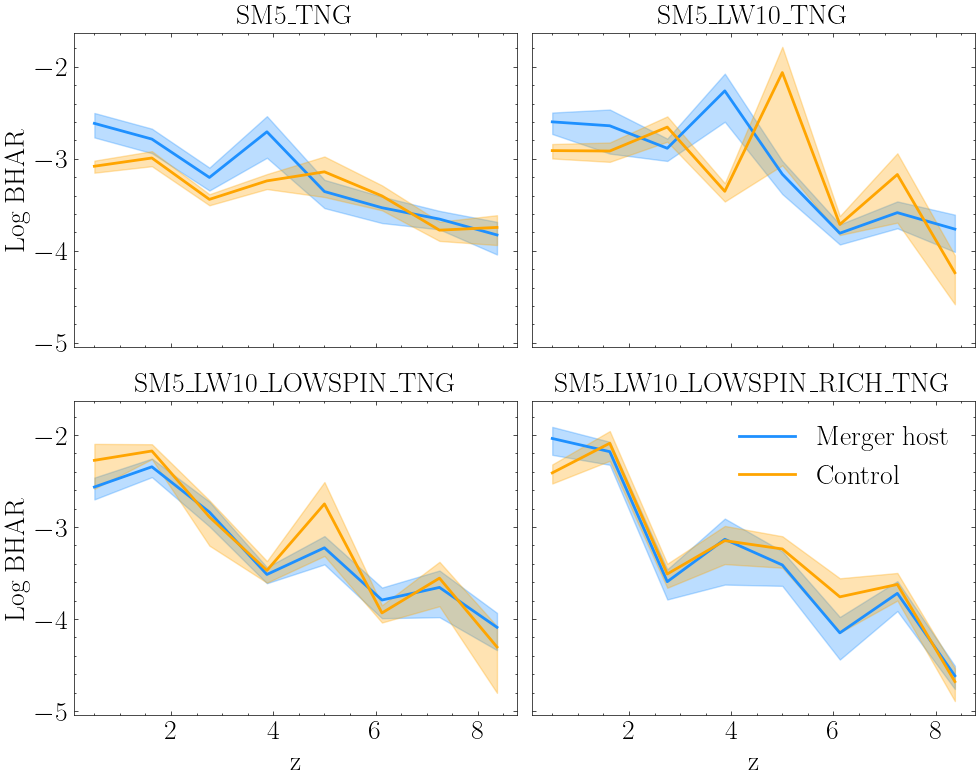

In [ ]:
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=20,ticksize=20,legendsize=20)
fig, axes = plt.subplots(2,2, figsize=(10,8),sharex=True,sharey=True)

# axes[1][2].set_visible(False)
# axes[1][0].set_position([0.24,0.125,0.228,0.343])
# axes[1][1].set_position([0.55,0.125,0.228,0.343])
flattened_axes = axes.flatten()

for i,sim in enumerate(brahma_simName_array):
    ax1 = hostplot.Mdot_evolution_comparison_plot(flattened_axes[i],brahma_sim_obj[sim],brahma_sims_zbin))
    ax1.set_title(sim)

axes[0,0].set_ylabel('Log BHAR')
axes[1,0].set_ylabel('Log BHAR')
axes[1,0].set_xlabel('z')
axes[1,1].set_xlabel('z')

ax1.legend()
fig.tight_layout()  

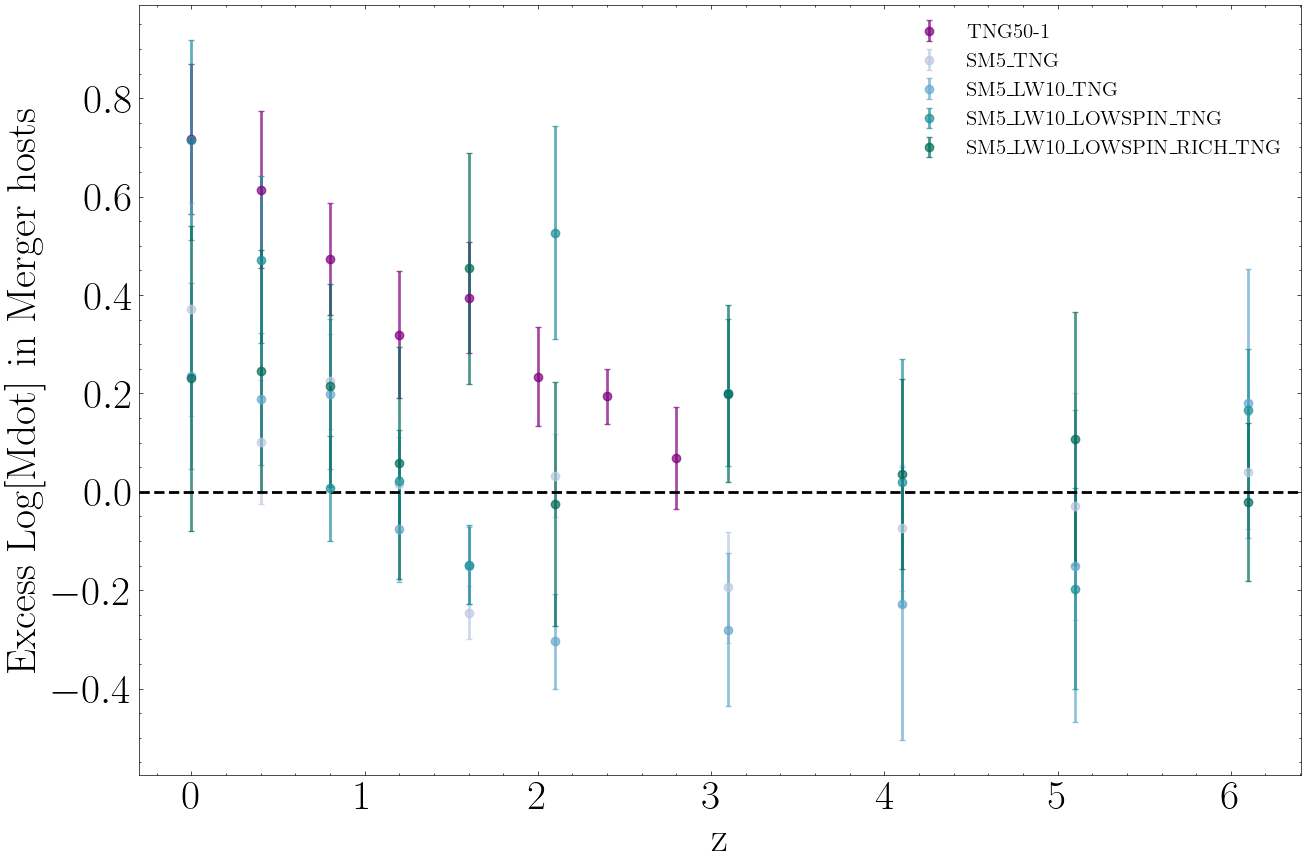

In [15]:
z_bins = np.arange(0,10,1)
z_bins_tng = np.arange(0,4,0.5)


hostplot.set_plot_style(linewidth=2, titlesize=30,labelsize=30,ticksize=30,legendsize=15)
fig,ax = plt.subplots(1,1,figsize=(15,10))


avg_sSFR_tng,std_sSFR_tng = hostplot.Mdot_enhancement_calculate(TNG_50_control,TNG_50_zbins)
ax.errorbar(TNG_50_zbins[:-1],avg_sSFR_tng,yerr=std_sSFR_tng,fmt='o',capsize=2,label='TNG50-1',color='purple',alpha=0.7)
for i,sim in enumerate(brahma_simName_array):
    avg_sSFR_enh,std_sSFR_enh = hostplot.Mdot_enhancement_calculate(brahma_sim_obj[sim],brahma_zbins)
    ax.errorbar(brahma_zbins[:-1],avg_sSFR_enh,yerr=std_sSFR_enh,fmt='o',capsize=2,label=sim,color=brahma_sim_colors[sim],alpha=0.7)

ax.set_xlabel('z')
ax.set_ylabel('Excess Log[Mdot] in Merger hosts')
ax.axhline(0,linestyle='--',color='k')
ax.legend()
fig.savefig('../../figures/BHAR_enhancement_comparison_all.pdf')

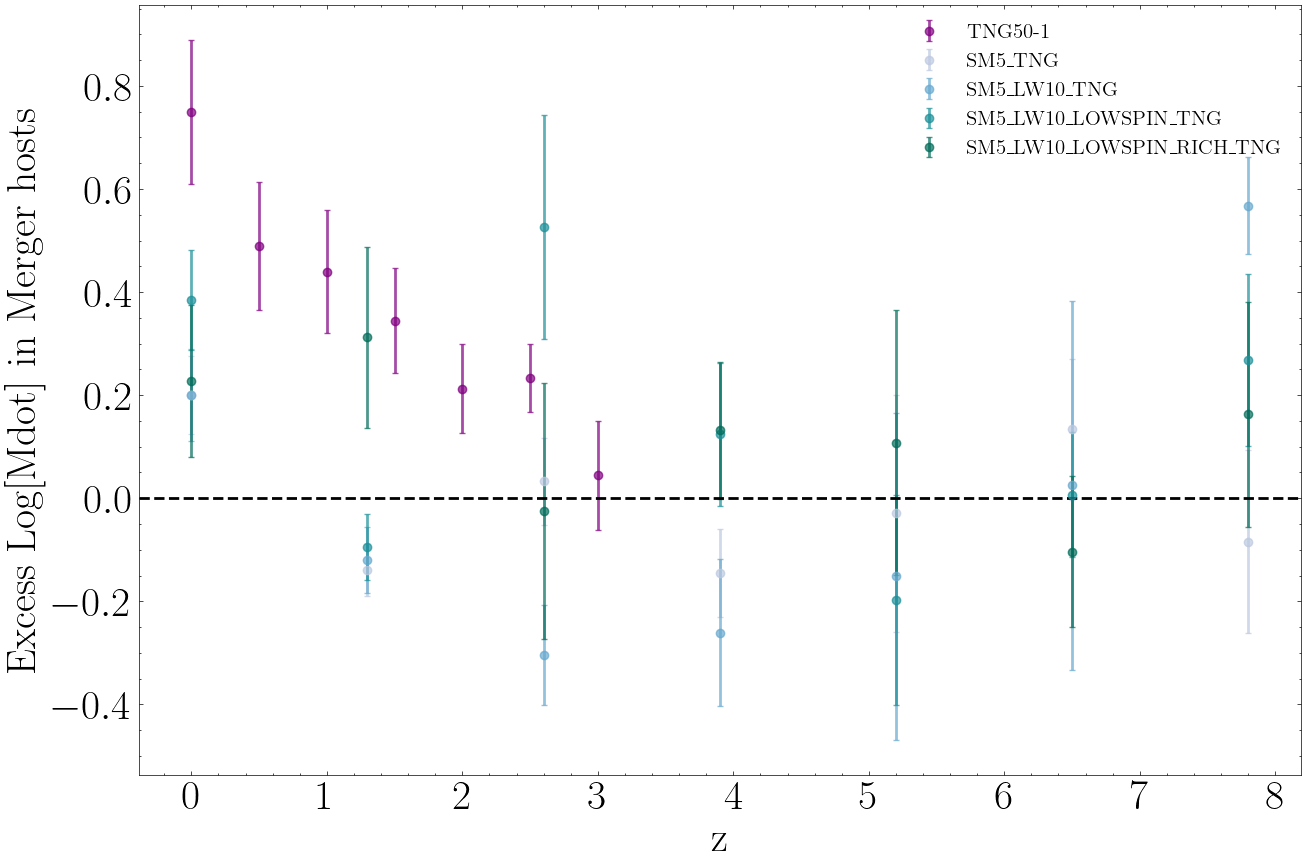

In [83]:
z_bins = np.arange(0,10,1)
z_bins_tng = np.arange(0,4,0.5)


hostplot.set_plot_style(linewidth=2, titlesize=30,labelsize=30,ticksize=30,legendsize=15)
fig,ax = plt.subplots(1,1,figsize=(15,10))


avg_sSFR_tng,std_sSFR_tng = hostplot.Mdot_enhancement_calculate(TNG_50_control,z_bins_tng)
ax.errorbar(z_bins_tng[:-1],avg_sSFR_tng,yerr=std_sSFR_tng,fmt='o',capsize=2,label='TNG50-1',color='purple',alpha=0.7)
for i,sim in enumerate(brahma_simName_array):
    avg_sSFR_enh,std_sSFR_enh = hostplot.Mdot_enhancement_calculate(brahma_sim_obj[sim],brahma_sims_zbin)
    ax.errorbar(brahma_sims_zbin[:-1],avg_sSFR_enh,yerr=std_sSFR_enh,fmt='o',capsize=2,label=sim,color=brahma_sim_colors[sim],alpha=0.7)

ax.set_xlabel('z')
ax.set_ylabel('Excess Log[Mdot] in Merger hosts')
ax.axhline(0,linestyle='--',color='k')
ax.legend()

## sBHAR enhancements in BRAHMA

Median sSFR in mergers:
SM5_TNG,2.25e-11
SM5_LW10_TNG,6.92e-11
SM5_LW10_LOWSPIN_TNG,1.56e-10
SM5_LW10_LOWSPIN_RICH_TNG,2.49e-10


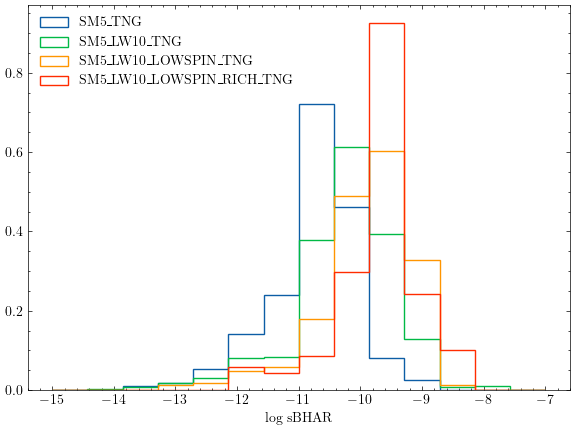

In [12]:
sBHAR_log_min = -15
sBHAR_log_max = -7
sBHAR_log_bins = np.linspace(sBHAR_log_min,sBHAR_log_max,15)

hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=10,ticksize=10,legendsize=10)
fig,ax = plt.subplots(1,1,figsize=(7,5))

print("Median sSFR in mergers:")
for i,sim in enumerate(brahma_simName_array):

    sBHAR_mergers = brahma_sim_obj[sim].sBHAR_merging_pop
    print(f"{sim},{np.median(sBHAR_mergers[sBHAR_mergers>0]):2.2e}")
    ax.hist(np.log10(sBHAR_mergers[sBHAR_mergers>0]),bins=sBHAR_log_bins,label=sim,histtype='step',density=True,color=brahma_sim_colors[sim])
ax.set_xlabel("log sBHAR")
ax.legend()
plt.show()

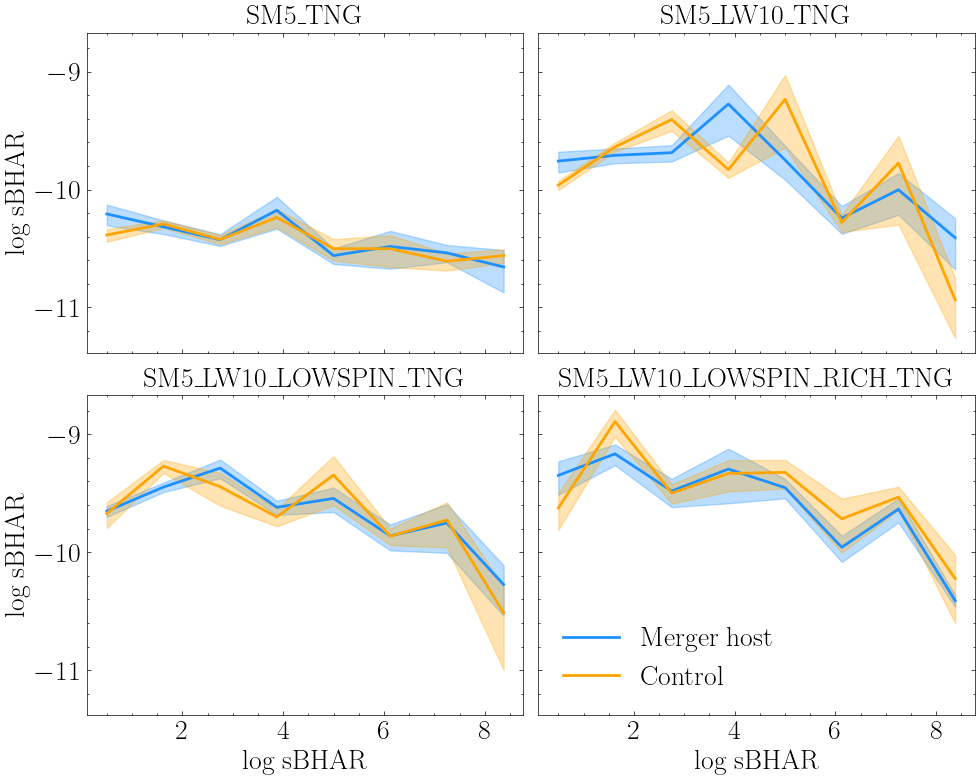

In [14]:
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=20,ticksize=20,legendsize=20)
fig, axes = plt.subplots(2,2, figsize=(10,8),sharex=True,sharey=True)

# axes[1][2].set_visible(False)
# axes[1][0].set_position([0.24,0.125,0.228,0.343])
# axes[1][1].set_position([0.55,0.125,0.228,0.343])
flattened_axes = axes.flatten()

for i,sim in enumerate(brahma_simName_array):
    ax1 = hostplot.sBHAR_evolution_comparison_plot(flattened_axes[i],brahma_sim_obj[sim],z_min=0,z_max=9,z_binsize=1)
    ax1.set_title(sim)

axes[0,0].set_ylabel('log sBHAR')
axes[1,0].set_ylabel('log sBHAR')
axes[1,0].set_xlabel('log sBHAR')
axes[1,1].set_xlabel('log sBHAR')

ax1.legend()
fig.tight_layout()  

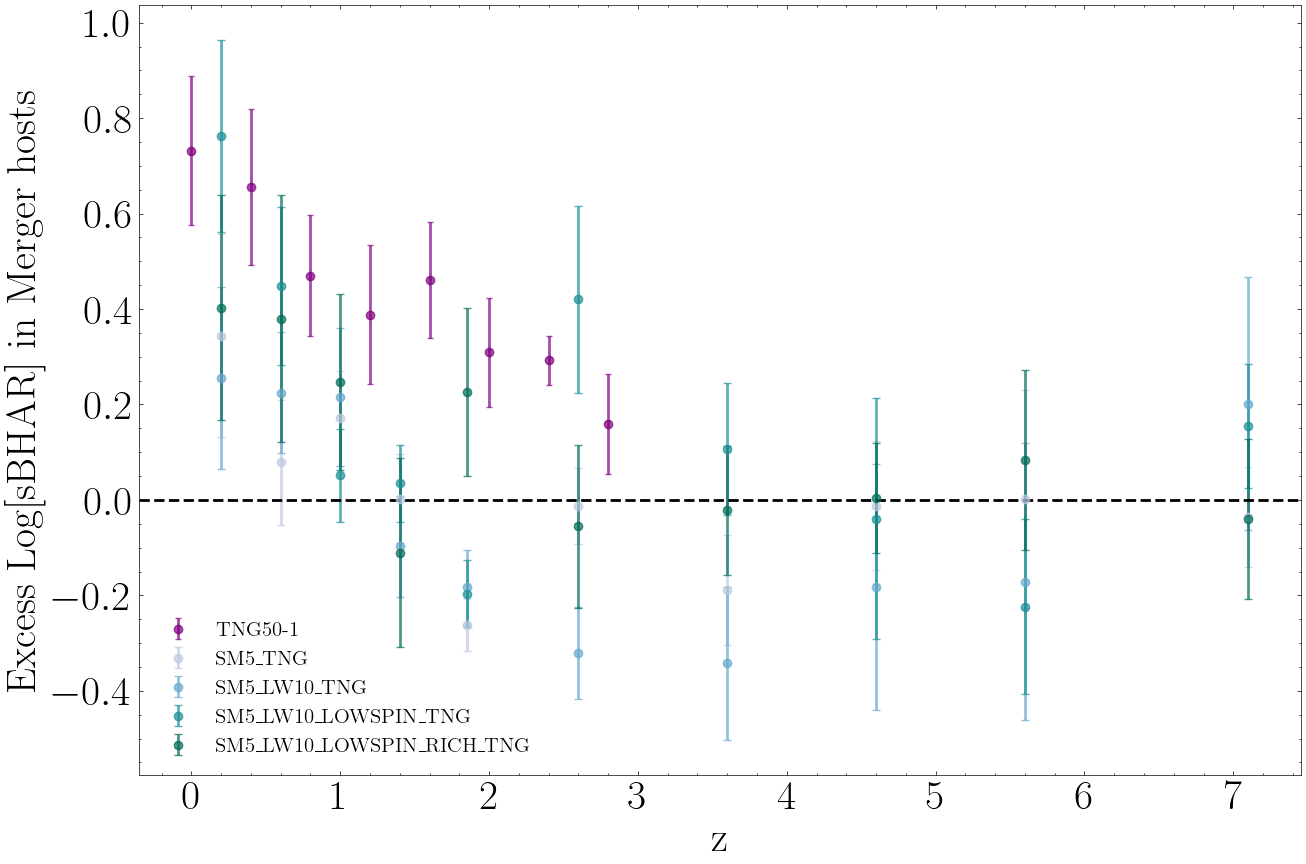

In [16]:
z_bins = np.arange(0,10,1)
z_bins_tng = np.arange(0,4,0.5)

hostplot.set_plot_style(linewidth=2, titlesize=30,labelsize=30,ticksize=30,legendsize=15)
fig,ax = plt.subplots(1,1,figsize=(15,10))

avg_sSFR_tng,std_sSFR_tng = hostplot.sBHAR_enhancement_calculate(TNG_50_control,TNG_50_zbins)
ax.errorbar(TNG_50_zbins[:-1],avg_sSFR_tng,yerr=std_sSFR_tng,fmt='o',capsize=2,label='TNG50-1',color='purple',alpha=0.7)
for i,sim in enumerate(brahma_simName_array):
    avg_sSFR_enh,std_sSFR_enh = hostplot.sBHAR_enhancement_calculate(brahma_sim_obj[sim],brahma_zbins)
    ax.errorbar(brahma_zbins[:-1]+np.diff(brahma_zbins)/2,avg_sSFR_enh,yerr=std_sSFR_enh,fmt='o',capsize=3,label=sim,color=brahma_sim_colors[sim],alpha=0.7)

ax.set_xlabel('z')
ax.set_ylabel('Excess Log[sBHAR] in Merger hosts')
ax.axhline(0,linestyle='--',color='k')
ax.legend(loc="lower left")
fig.savefig('../../figures/sBHAR_enhancement_comparison_all.pdf')

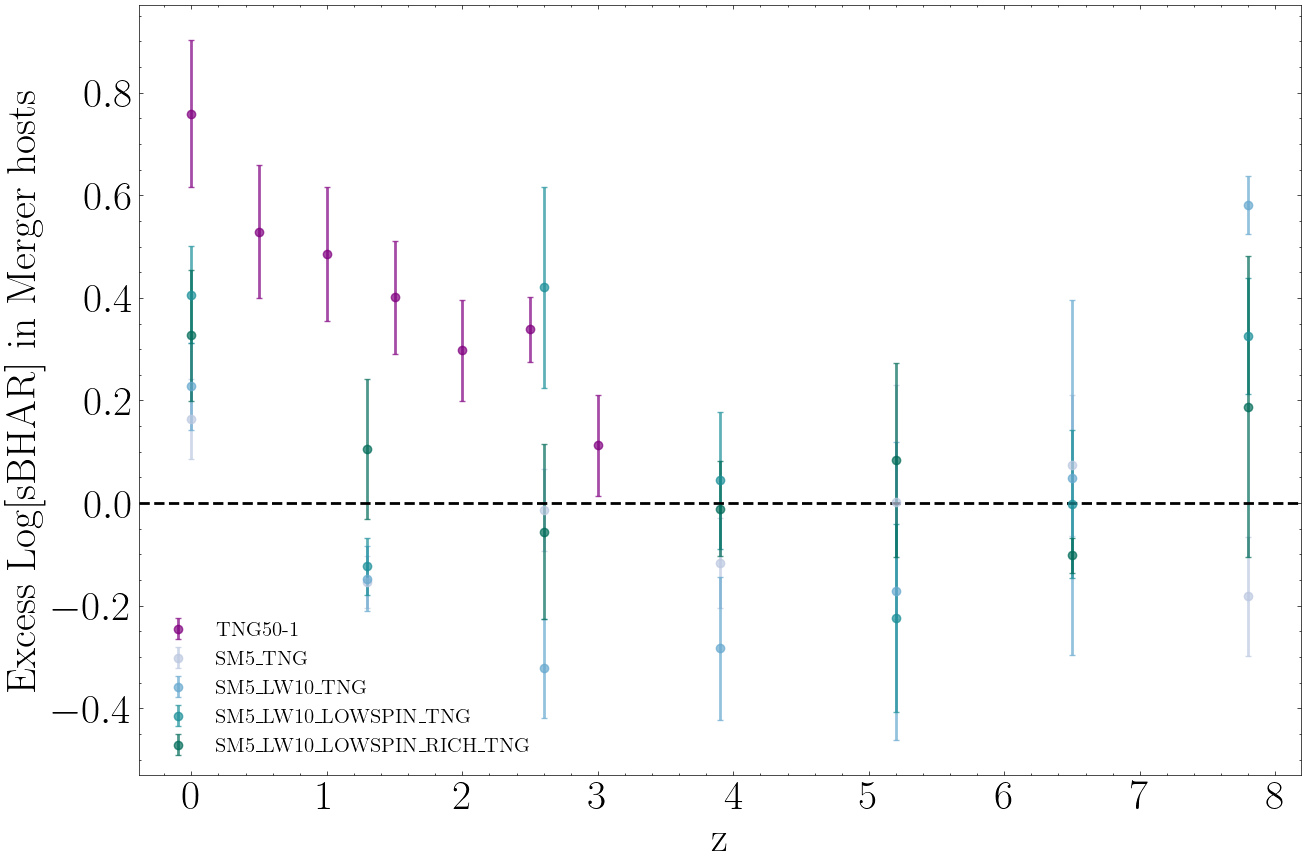

In [84]:
z_bins = np.arange(0,10,1)
z_bins_tng = np.arange(0,4,0.5)

hostplot.set_plot_style(linewidth=2, titlesize=30,labelsize=30,ticksize=30,legendsize=15)
fig,ax = plt.subplots(1,1,figsize=(15,10))

avg_sSFR_tng,std_sSFR_tng = hostplot.sBHAR_enhancement_calculate(TNG_50_control,z_bins_tng)
ax.errorbar(z_bins_tng[:-1],avg_sSFR_tng,yerr=std_sSFR_tng,fmt='o',capsize=2,label='TNG50-1',color='purple',alpha=0.7)
for i,sim in enumerate(brahma_simName_array):
    avg_sSFR_enh,std_sSFR_enh = hostplot.sBHAR_enhancement_calculate(brahma_sim_obj[sim],brahma_sims_zbin)
    ax.errorbar(brahma_sims_zbin[:-1],avg_sSFR_enh,yerr=std_sSFR_enh,fmt='o',capsize=2,label=sim,color=brahma_sim_colors[sim],alpha=0.7)

ax.set_xlabel('z')
ax.set_ylabel('Excess Log[sBHAR] in Merger hosts')
ax.axhline(0,linestyle='--',color='k')
ax.legend(loc="lower left")

### sBHAR evolution with z

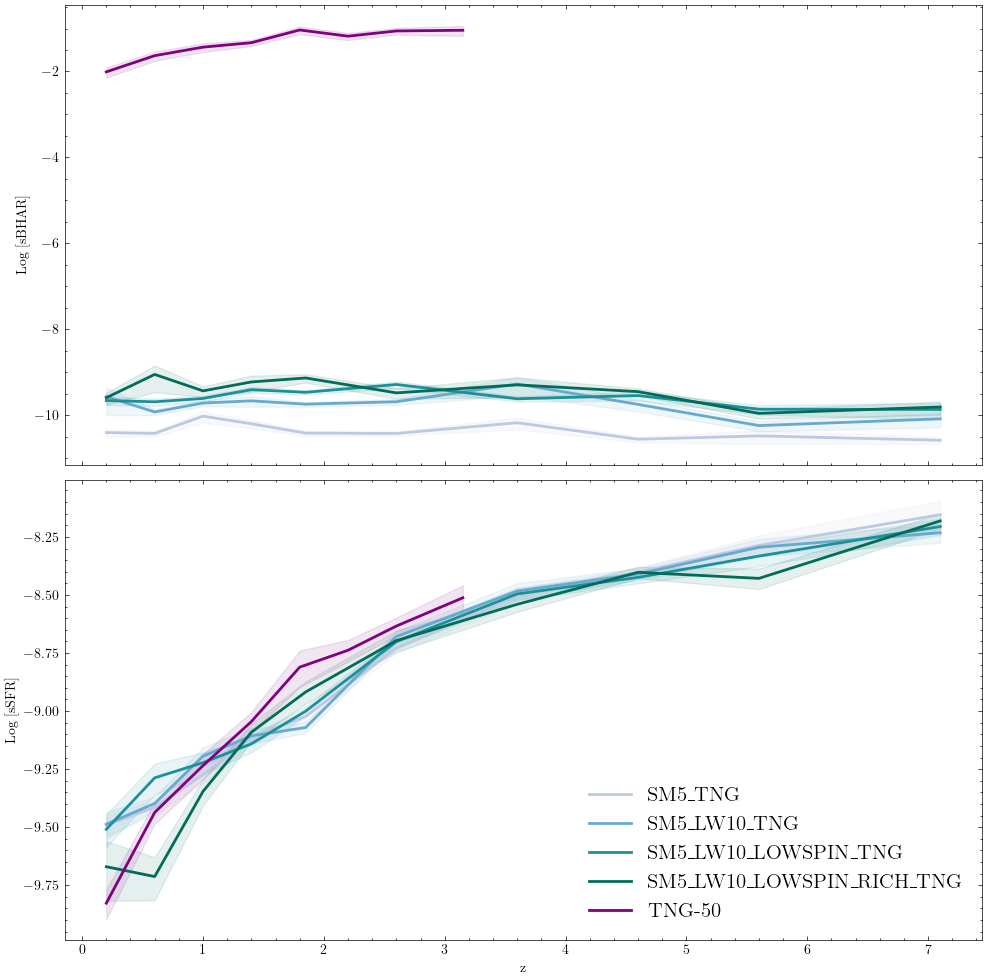

In [8]:
fig,axes = plt.subplots(2,1,figsize=(10,10),sharex=True)
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=30,ticksize=20,legendsize=15)

ax1 = hostplot.sBHAR_z_evolve_plot(axes[0],brahma_zbins,brahma_sim_obj,brahma_simName_array,brahma_sim_colors)
ax2 = hostplot.sBHAR_z_evolve_plot_TNG(axes[0],TNG_50_zbins,TNG_50_control,TNG50color='purple')
#ax1.legend()
ax1.set_ylabel("Log [sBHAR]")


# ax2 = hostplot.Mgas_z_evolve_plot(axes[1],brahma_zbins,brahma_sim_obj,brahma_simName_array,brahma_sim_colors)
# ax2 = hostplot.Mgas_z_evolve_plot_TNG(axes[1],TNG_50_zbins,TNG_50_control,TNG50color='purple')
# #ax2.legend()
# ax2.set_ylabel("Log [Mgas/$M_{\odot}$]")
# #ax2.set_xlabel("z") 


ax3 = hostplot.sSFR_z_evolve_plot(axes[1],brahma_zbins,brahma_sim_obj,brahma_simName_array,brahma_sim_colors)
ax3 = hostplot.sSFR_z_evolve_plot_TNG(axes[1],TNG_50_zbins,TNG_50_control,TNG50color='purple')
#ax3.legend()
ax3.set_ylabel("Log [sSFR]")
ax3.set_xlabel("z") 
ax3.legend()

plt.tight_layout()
fig.savefig('../../figures/sBHAR_sSFR_evolution_brahma_all.pdf')

Median sSFR in mergers:
SM5_TNG,8.52e-10
SM5_LW10_TNG,8.60e-10
SM5_LW10_LOWSPIN_TNG,1.03e-09
SM5_LW10_LOWSPIN_RICH_TNG,1.25e-09
Median sBHAR in mergers:
SM5_TNG,2.25e-11
SM5_LW10_TNG,6.92e-11
SM5_LW10_LOWSPIN_TNG,1.56e-10
SM5_LW10_LOWSPIN_RICH_TNG,2.49e-10
Median Mgas in mergers:
SM5_TNG,6.35e+08
SM5_LW10_TNG,7.80e+08
SM5_LW10_LOWSPIN_TNG,1.04e+09
SM5_LW10_LOWSPIN_RICH_TNG,2.25e+09


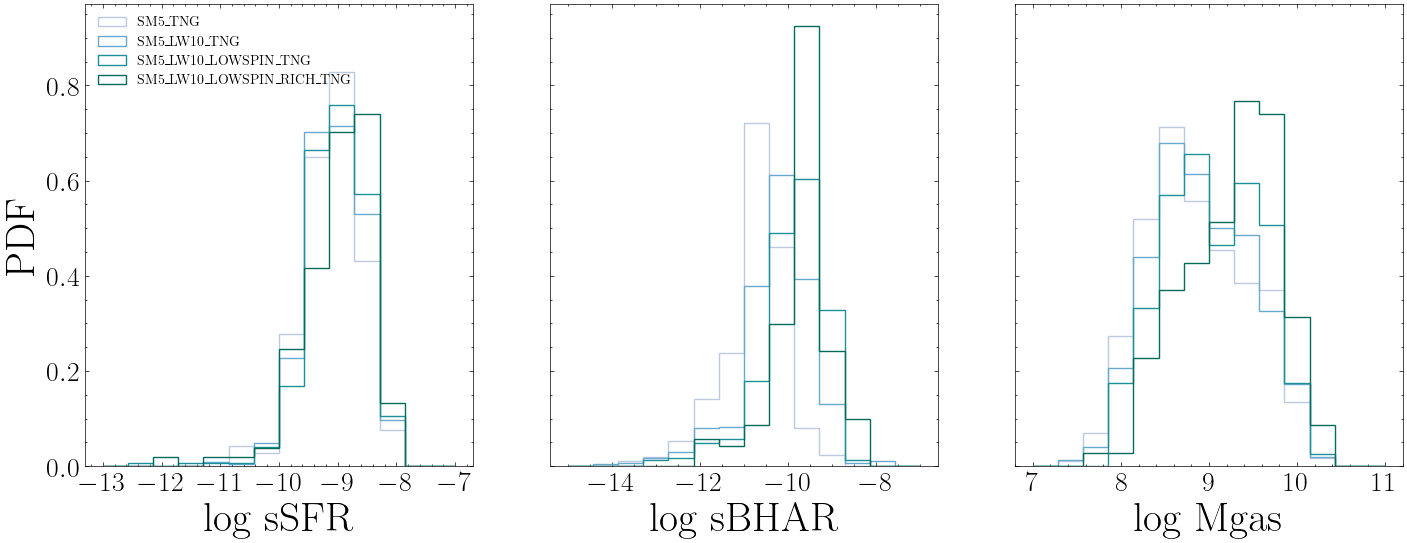

In [18]:
fig,axes = plt.subplots(1,3,figsize=(17,6),sharey=True)

hostplot.set_plot_style(linewidth=5, titlesize=20,labelsize=20,ticksize=12,legendsize=10)
plt.rcParams.update({"font.weight": "bold"})
ax1 = hostplot.sSFR_dist_brahma(axes[0],brahma_simName_array,brahma_sim_obj,brahma_sim_colors)
ax2 = hostplot.sBHAR_dist_brahma(axes[1],brahma_simName_array,brahma_sim_obj,brahma_sim_colors)
ax3 = hostplot.Mgas_dist_brahma(axes[2],brahma_simName_array,brahma_sim_obj,brahma_sim_colors)


ax1.legend(loc="upper left")
ax1.set_ylabel('PDF')
fig.savefig('../../figures/sSFR_sBHAR_Mgas_distribution_brahma_all.pdf')